In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./vgsales.csv')

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Dataset Preview:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Checking for Missing Values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      

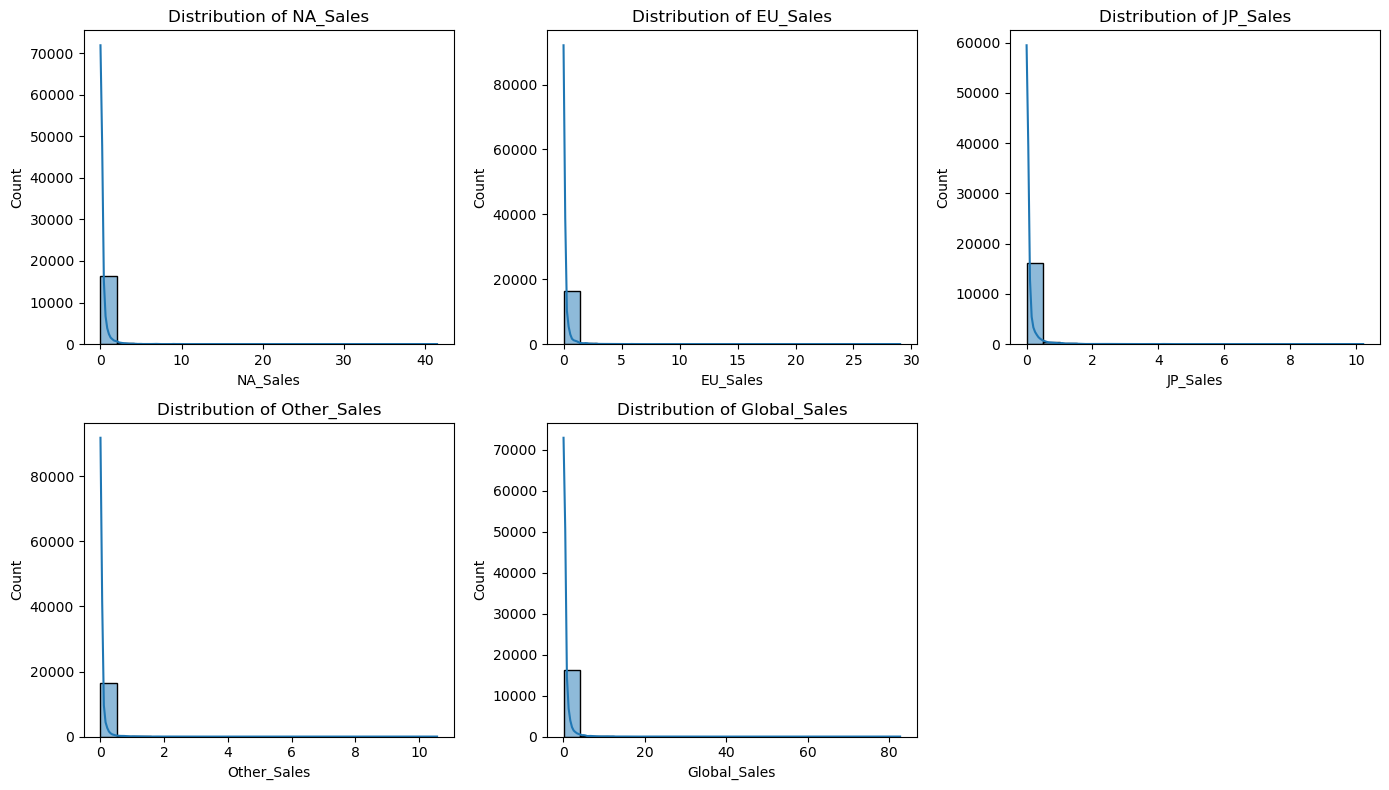

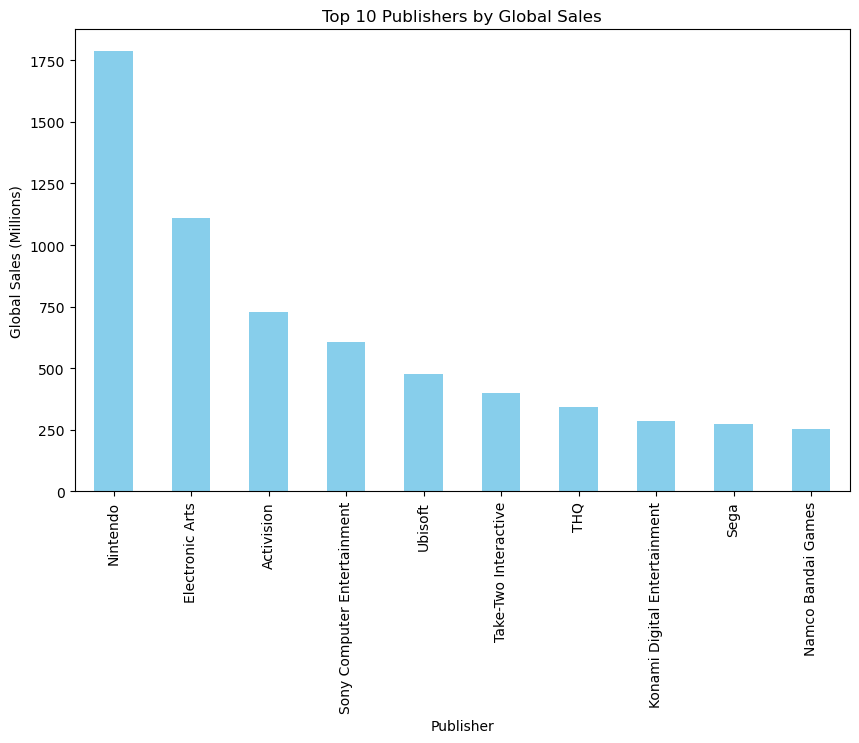

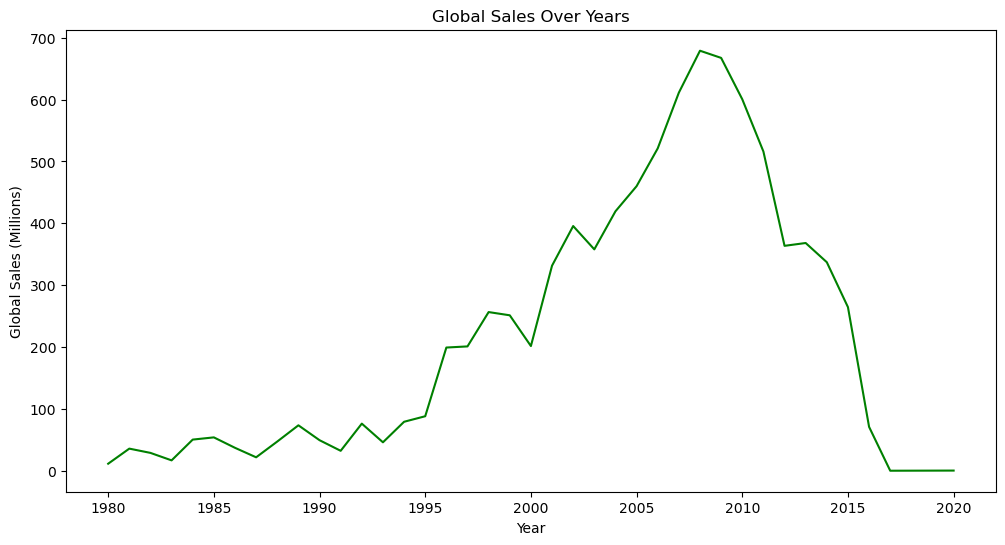

/tmp/ipykernel_636145/2204207068.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')


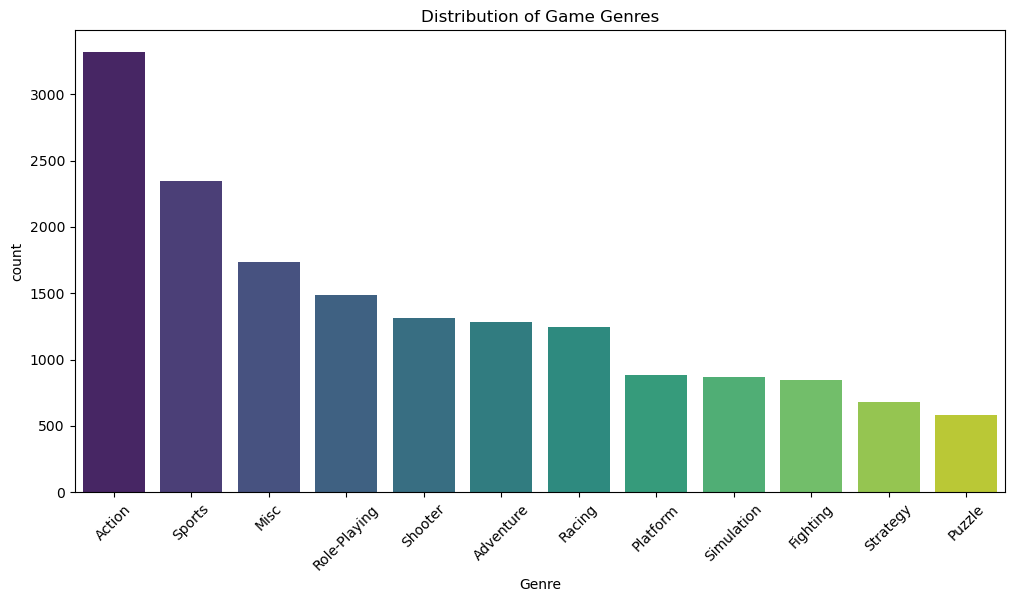

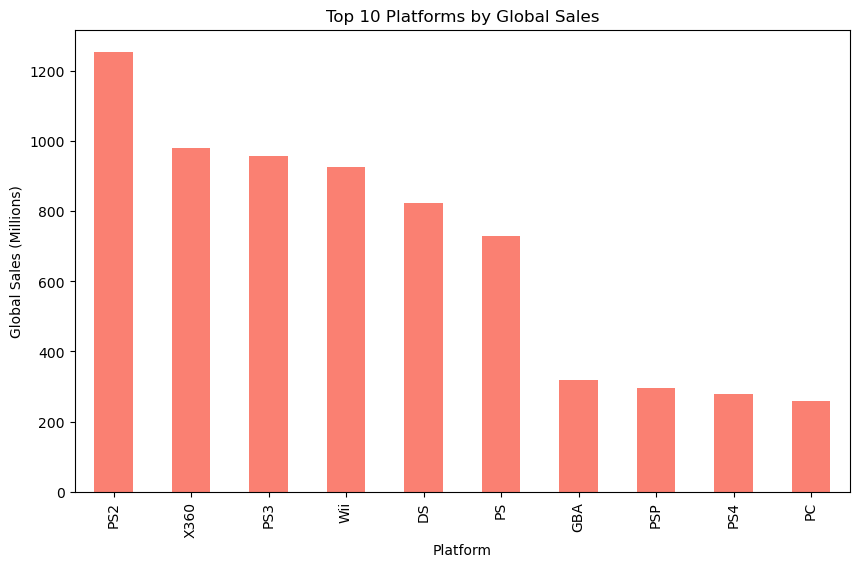

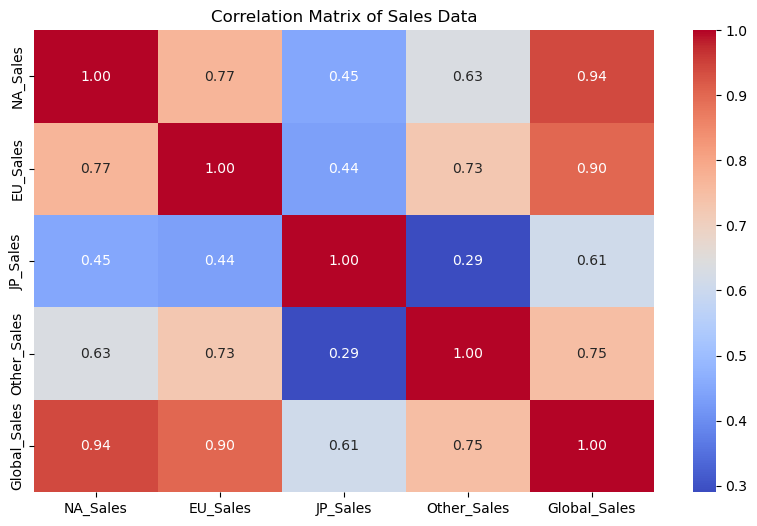

In [4]:

# Display the first few rows
print("Dataset Preview:")
display(df.head())

# 1. Dataset Overview
print("\nDataset Information:")
df.info()

print("\nChecking for Missing Values:")
print(df.isnull().sum())

# 2. Statistical Summary
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# 3. Distribution of Numerical Data
numerical_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 4. Top 10 Publishers by Global Sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.show()

# 5. Sales Trend Over Years
# Drop rows with missing 'Year' values
df_yearly_sales = df.dropna(subset=['Year'])
yearly_sales = df_yearly_sales.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', color='green')
plt.title('Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.show()

# 6. Genre Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Game Genres')
plt.xticks(rotation=45)
plt.show()

# 7. Platform Analysis - Top 10 Platforms by Total Sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', color='salmon')
plt.title('Top 10 Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.show()

# 8. Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sales Data')
plt.show()
